In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
import os
import pandas as pd

dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

display(df.head(10))

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


In [3]:
df.to_csv("amazon.csv")

In [4]:
df = pd.read_csv('amazon.csv')

In [5]:
df =df.sample(100000)
#veri çok büyük bu yüzden rastgele 100 binini alırız.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 582101 to 1047337
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      100000 non-null  int64 
 1   reviewerID      100000 non-null  object
 2   asin            100000 non-null  object
 3   reviewerName    98531 non-null   object
 4   helpful         100000 non-null  object
 5   reviewText      99933 non-null   object
 6   overall         100000 non-null  int64 
 7   summary         99999 non-null   object
 8   unixReviewTime  100000 non-null  int64 
 9   reviewTime      100000 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.4+ MB


In [7]:
df.sample(5)

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1593870,1593870,A2QXH2TWDMPEH2,B00CMEN95U,Schroeder (Cult Movies Magazine),"[6, 22]",Suck it Samsung! I'd rather bury my money in t...,1,R U CRAZY!,1390780800,"01 27, 2014"
1140183,1140183,A1GTHL1ZT5BAXO,B005HMKKH4,CCJJLL,"[0, 0]",I used this HDD with my PVR and it has been ve...,5,Nice bang for the buck!,1383609600,"11 5, 2013"
1253029,1253029,AL625VKQB2P5Z,B006Y444T4,Mr. Tragic,"[0, 0]",Audio and video are great and the integration ...,4,Great audio/video. Terrible GPS.,1383609600,"11 5, 2013"
534167,534167,A290XSFY4NQDJQ,B001TK3D4K,Royalblues,"[0, 0]",It was weeks of agonizing research which Blura...,5,Excellent !,1263686400,"01 17, 2010"
1136203,1136203,AK7Z07OSNPVQF,B005GTR0R6,"Bran415 ""CA ALL DAY!!!""","[0, 0]",Fast shipping! Bought this for my samsung gala...,4,works like a champ!,1360540800,"02 11, 2013"


In [8]:
df.shape

(100000, 10)

## Feature Engineering

tarih ve saat sütunu oluşturma ve reviewText'i temizleme

In [9]:
from datetime import datetime

In [10]:
condition=lambda row: datetime.fromtimestamp(row).strftime("%m-%d-%Y")
df["unixReviewTime"]=df["unixReviewTime"].apply(condition)

In [11]:
df.drop(labels="reviewTime",axis=1,inplace=True)

In [12]:
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
582101,582101,A2K73UHMU13Q9S,B002BU8LIK,DCFROMLA,"[0, 0]","This item worked better than advertised, It re...",5,Gsky USB Lan adapter- with antenna,08-07-2010
1242225,1242225,A3TLY1A7NGVCQM,B006RKUTGW,"Alexander E. Paulsen ""AlexP""","[0, 0]",I have been using Mediabridge for about 3 year...,5,Been very pleased with this line of products,12-29-2013
443921,443921,A1DDARZ5BAVTN6,B001DK1ZVO,"Zachary May ""zach99998""","[2, 2]",I bought this item because it was one of the c...,5,"Simple, cheap, no problems",08-05-2011
1179473,1179473,A2VH0UT5EQFB6P,B005QCDY50,Loveguitar,"[0, 0]",Definitely helps with glare though it blurrs t...,4,Helps with Glare,08-25-2012
1521883,1521883,A5Q1FK0FWU7DH,B00AGBVVI8,TC,"[3, 4]",These earphones sound very good. And they fit...,4,HMMMM,09-26-2013


##Metin sütunundan html etiketlerini temizleme

In [13]:
pattern = r"\&\[0-9]+\;"
df["preprocessed"] = df["reviewText"].str.replace(pat=pattern, repl="", regex=True)

##Gereksiz sütunları siliyoruz

In [14]:
df.drop(["reviewerID","asin","reviewerName","helpful","summary","unixReviewTime"],axis=1,inplace=True)

In [15]:
df.overall.unique()

array([5, 4, 2, 1, 3])

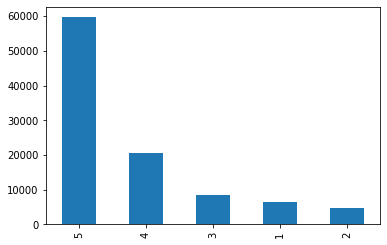

In [16]:
df.overall.value_counts().plot.bar()

##NLP Text Preprocessing
temizleme işlemi

In [17]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
df["reviewText"]=df["reviewText"].str.lower() #büyük harfle yazılmış 10000 yorum küçük harfe çevirdi
df["reviewText"]=df["reviewText"].str.replace('[^\W\S]','')#noktalama işaretlerini kaldırır
df["reviewText"]=df["reviewText"].str.replace('\d+','')#rakamları kaldırır
df["reviewText"]=df["reviewText"].str.replace('\n','')#yeni satırları kaldırır
df["reviewText"]=df["reviewText"].str.replace('\r','')#enteri kaldırır

##Genel puanımızın duyguya göre sınıflandırılması

In [19]:
df.loc[df["overall"]==3,"sentimentOverall"]="neutral"
df.loc[df["overall"]<3,"sentimentOverall"]="negative"
df.loc[df["overall"]>3,"sentimentOverall"]="positive"

In [20]:
df.head()

,reviewText,overall,preprocessed,sentimentOverall
582101,"this item worked better than advertised, it re...",5,"This item worked better than advertised, It re...",positive
1242225,i have been using mediabridge for about years...,5,I have been using Mediabridge for about 3 year...,positive
443921,i bought this item because it was one of the c...,5,I bought this item because it was one of the c...,positive
1179473,definitely helps with glare though it blurrs t...,4,Definitely helps with glare though it blurrs t...,positive
1521883,these earphones sound very good. and they fit...,4,These earphones sound very good. And they fit...,positive


In [21]:
df["sentimentOverall"].value_counts()

positive    80378
negative    11206
neutral      8416
Name: sentimentOverall, dtype: int64

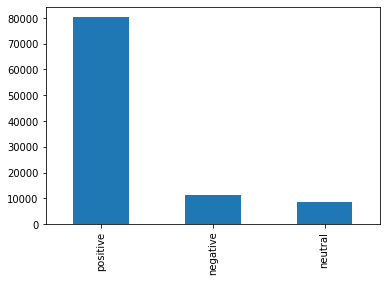

In [22]:
df["sentimentOverall"].value_counts().plot.bar()

In [23]:
df.reviewText.isnull().sum()

67

In [24]:
df=df[df.reviewText.notna()]

In [25]:
df.to_csv('pause0.csv')

In [26]:
df.reviewText.isnull().sum()

0

In [27]:
df=pd.read_csv('pause0.csv')

##Tokenization

In [28]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(str(i)) for i in df['reviewText'].values]

In [29]:
df.to_csv('pause1.csv')

In [30]:
df=pd.read_csv('pause1.csv')

In [31]:
df=pd.read_csv('pause1.csv')

In [32]:
df.head()

,Unnamed: 0,Unnamed: 0.1,reviewText,overall,preprocessed,sentimentOverall,tokenized
0,0,582101,"this item worked better than advertised, it re...",5,"This item worked better than advertised, It re...",positive,"['this', 'item', 'worked', 'better', 'than', '..."
1,1,1242225,i have been using mediabridge for about years...,5,I have been using Mediabridge for about 3 year...,positive,"['i', 'have', 'been', 'using', 'mediabridge', ..."
2,2,443921,i bought this item because it was one of the c...,5,I bought this item because it was one of the c...,positive,"['i', 'bought', 'this', 'item', 'because', 'it..."
3,3,1179473,definitely helps with glare though it blurrs t...,4,Definitely helps with glare though it blurrs t...,positive,"['definitely', 'helps', 'with', 'glare', 'thou..."
4,4,1521883,these earphones sound very good. and they fit...,4,These earphones sound very good. And they fit...,positive,"['these', 'earphones', 'sound', 'very', 'good...."


In [33]:
df=df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

##Polarity & Subjectivity

In [34]:
from textblob import TextBlob
df[["polarity","subjectivity"]]=df["reviewText"].apply(lambda t:pd.Series(TextBlob(t).sentiment))

##Save and Load

In [35]:
df.to_csv('pause4.csv')

In [36]:
import pandas as pd

In [37]:
df=pd.read_csv('pause4.csv')

In [38]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [39]:
df.loc[df['subjectivity']>0.5,'sentimentPolarity']="positive" #positive
df.loc[df['subjectivity']==0.5,'sentimentPolarity']="neutral" #neutral
df.loc[df['subjectivity']<0.5,'sentimentPolarity']="negative" #negative
df.head()

,reviewText,overall,preprocessed,sentimentOverall,tokenized,polarity,subjectivity,sentimentPolarity
0,"this item worked better than advertised, it re...",5,"This item worked better than advertised, It re...",positive,"['this', 'item', 'worked', 'better', 'than', '...",0.359405,0.622738,positive
1,i have been using mediabridge for about years...,5,I have been using Mediabridge for about 3 year...,positive,"['i', 'have', 'been', 'using', 'mediabridge', ...",-0.091667,0.619444,positive
2,i bought this item because it was one of the c...,5,I bought this item because it was one of the c...,positive,"['i', 'bought', 'this', 'item', 'because', 'it...",0.011111,0.222222,negative
3,definitely helps with glare though it blurrs t...,4,Definitely helps with glare though it blurrs t...,positive,"['definitely', 'helps', 'with', 'glare', 'thou...",0.169444,0.592963,positive
4,these earphones sound very good. and they fit...,4,These earphones sound very good. And they fit...,positive,"['these', 'earphones', 'sound', 'very', 'good....",0.247244,0.538846,positive


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

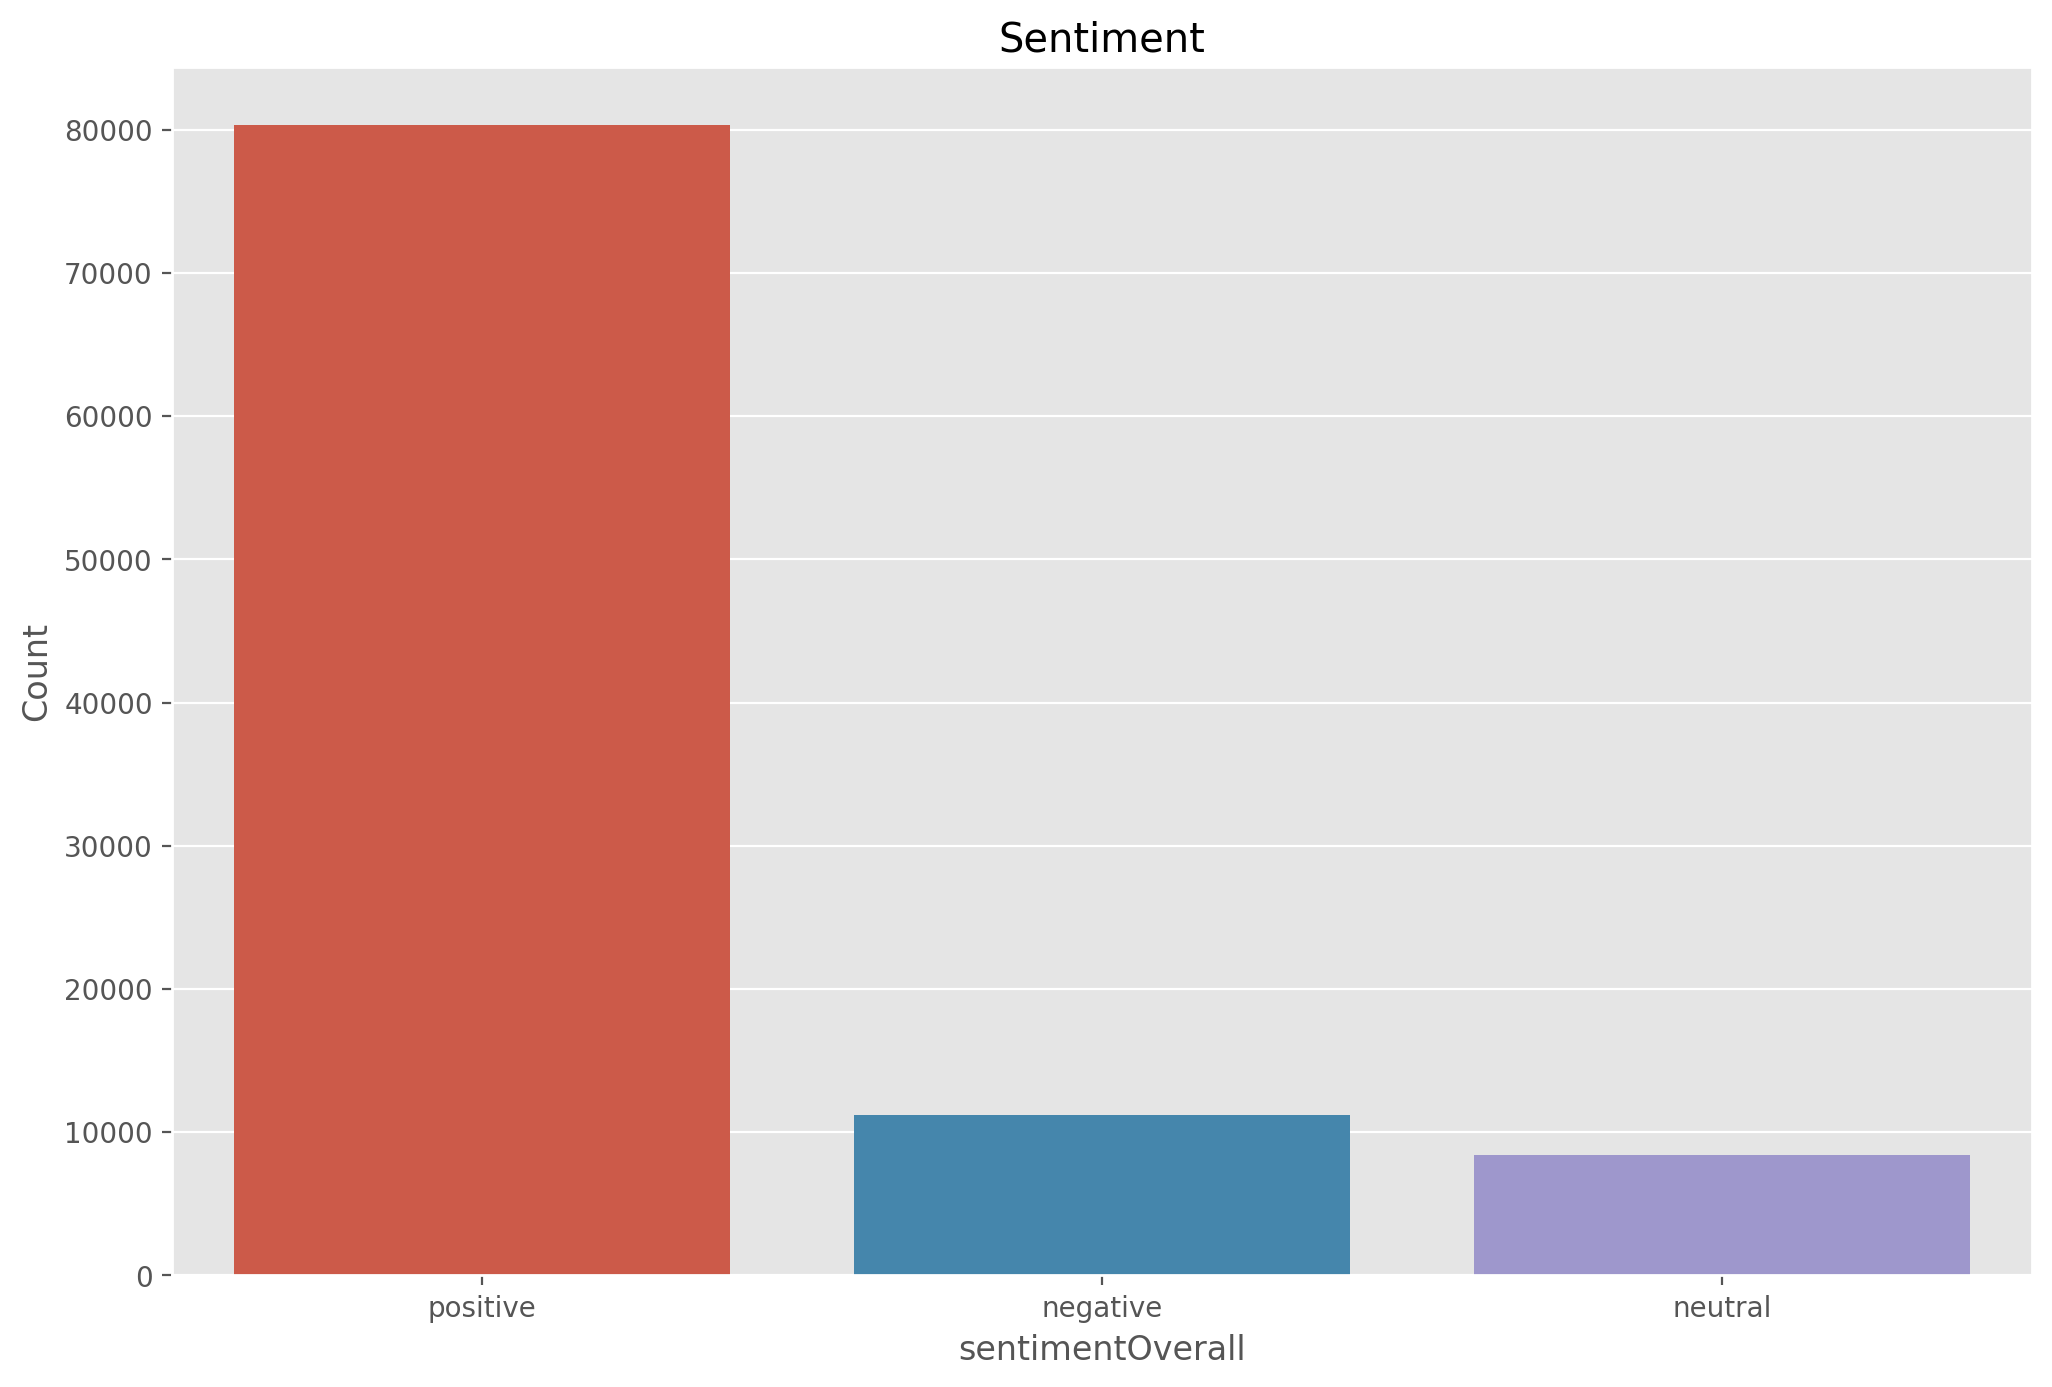

In [41]:
plt.style.use('ggplot')
fig=plt.figure(figsize=(12,8), dpi=200)
ax=plt.subplot(111)
ax=sns.countplot(x='sentimentOverall', data=df)
ax.set_title('Sentiment')
ax.set_ylabel('Count')

In [42]:
df[["sentimentOverall","sentimentPolarity"]]
#tutarsızlık oluştu

,sentimentOverall,sentimentPolarity
0,positive,positive
1,positive,positive
2,positive,negative
3,positive,positive
4,positive,positive
...,...,...
99928,positive,negative
99929,positive,negative
99930,negative,negative
99931,positive,positive


##Word Cloud

In [43]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [45]:
def create_wordcloud(text, mask):
    mask = np.array(Image.open(mask))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = 'white',
                   mask = mask,
                   max_words = 25000,
                   stopwords = stopwords)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Clous Saved Successfully')
    path='wc.png'
    display(Image.open(path))

negative = df[df['sentimentOverall']=='negative'].reviewText  # negative comments

positive = df[df['sentimentOverall']=='positive'].reviewText  # positive comments

Word Clous Saved Successfully


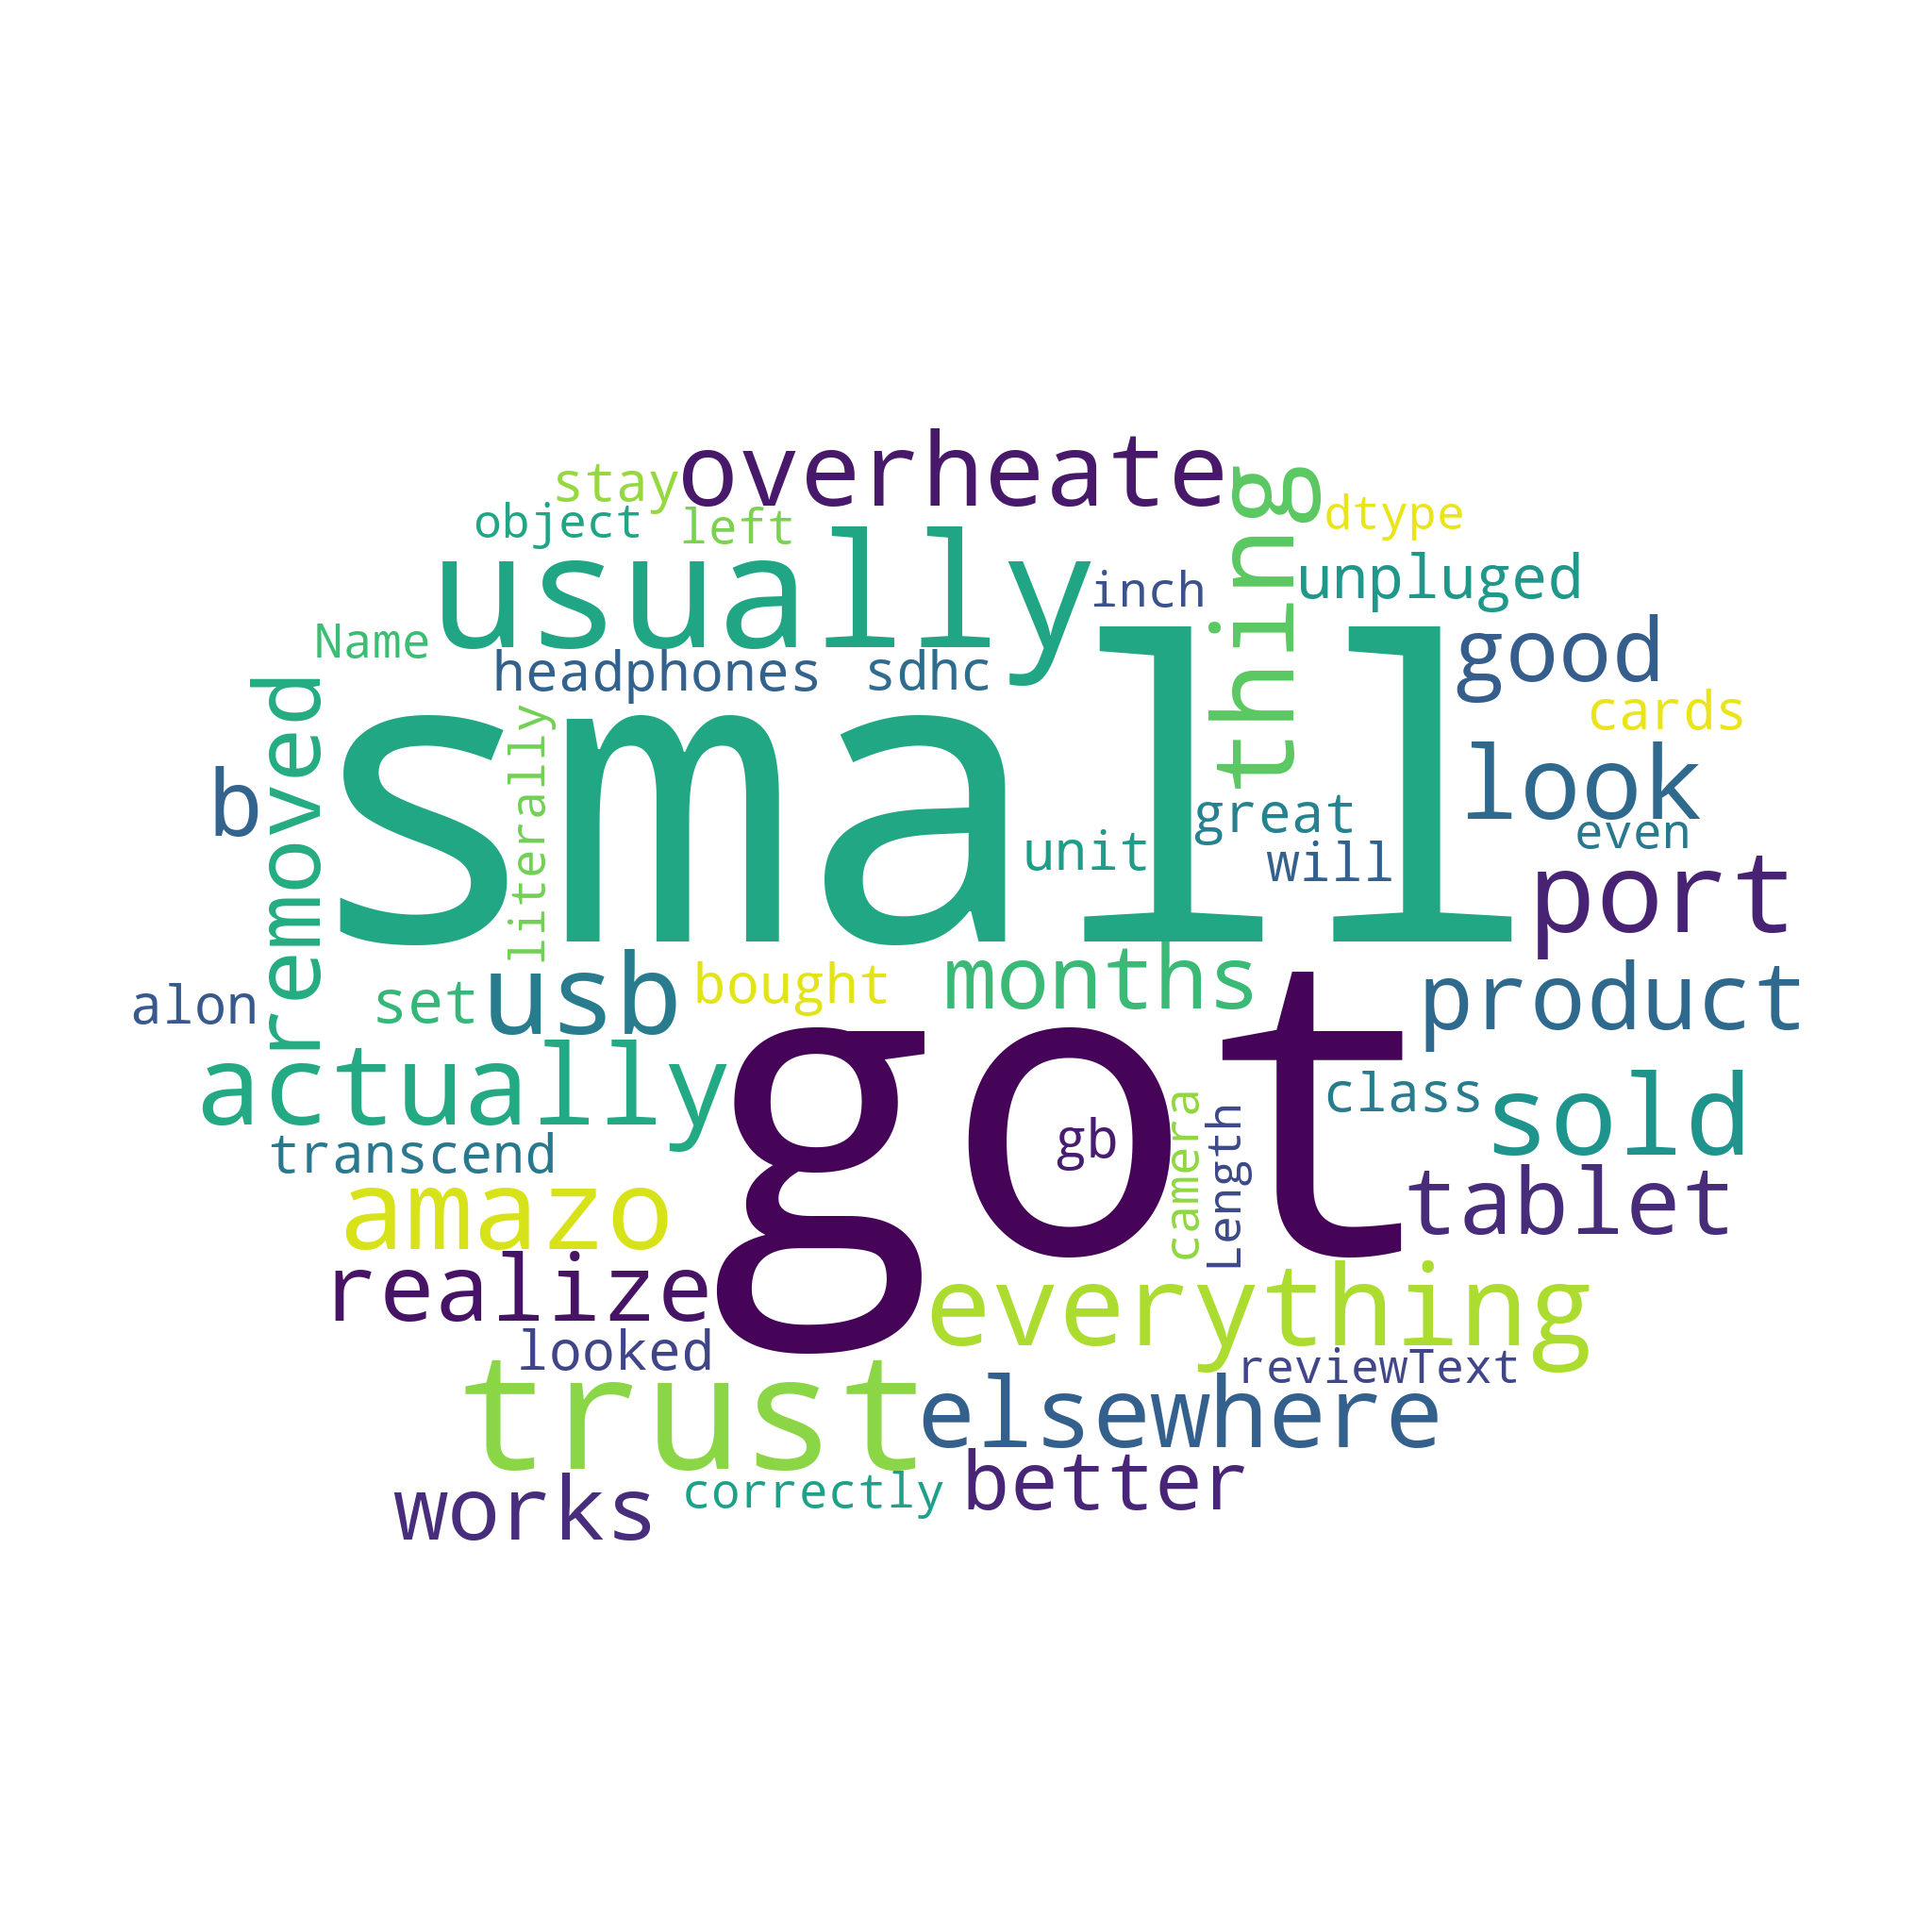

In [48]:
create_wordcloud(negative, 'comment.png')

Word Clous Saved Successfully


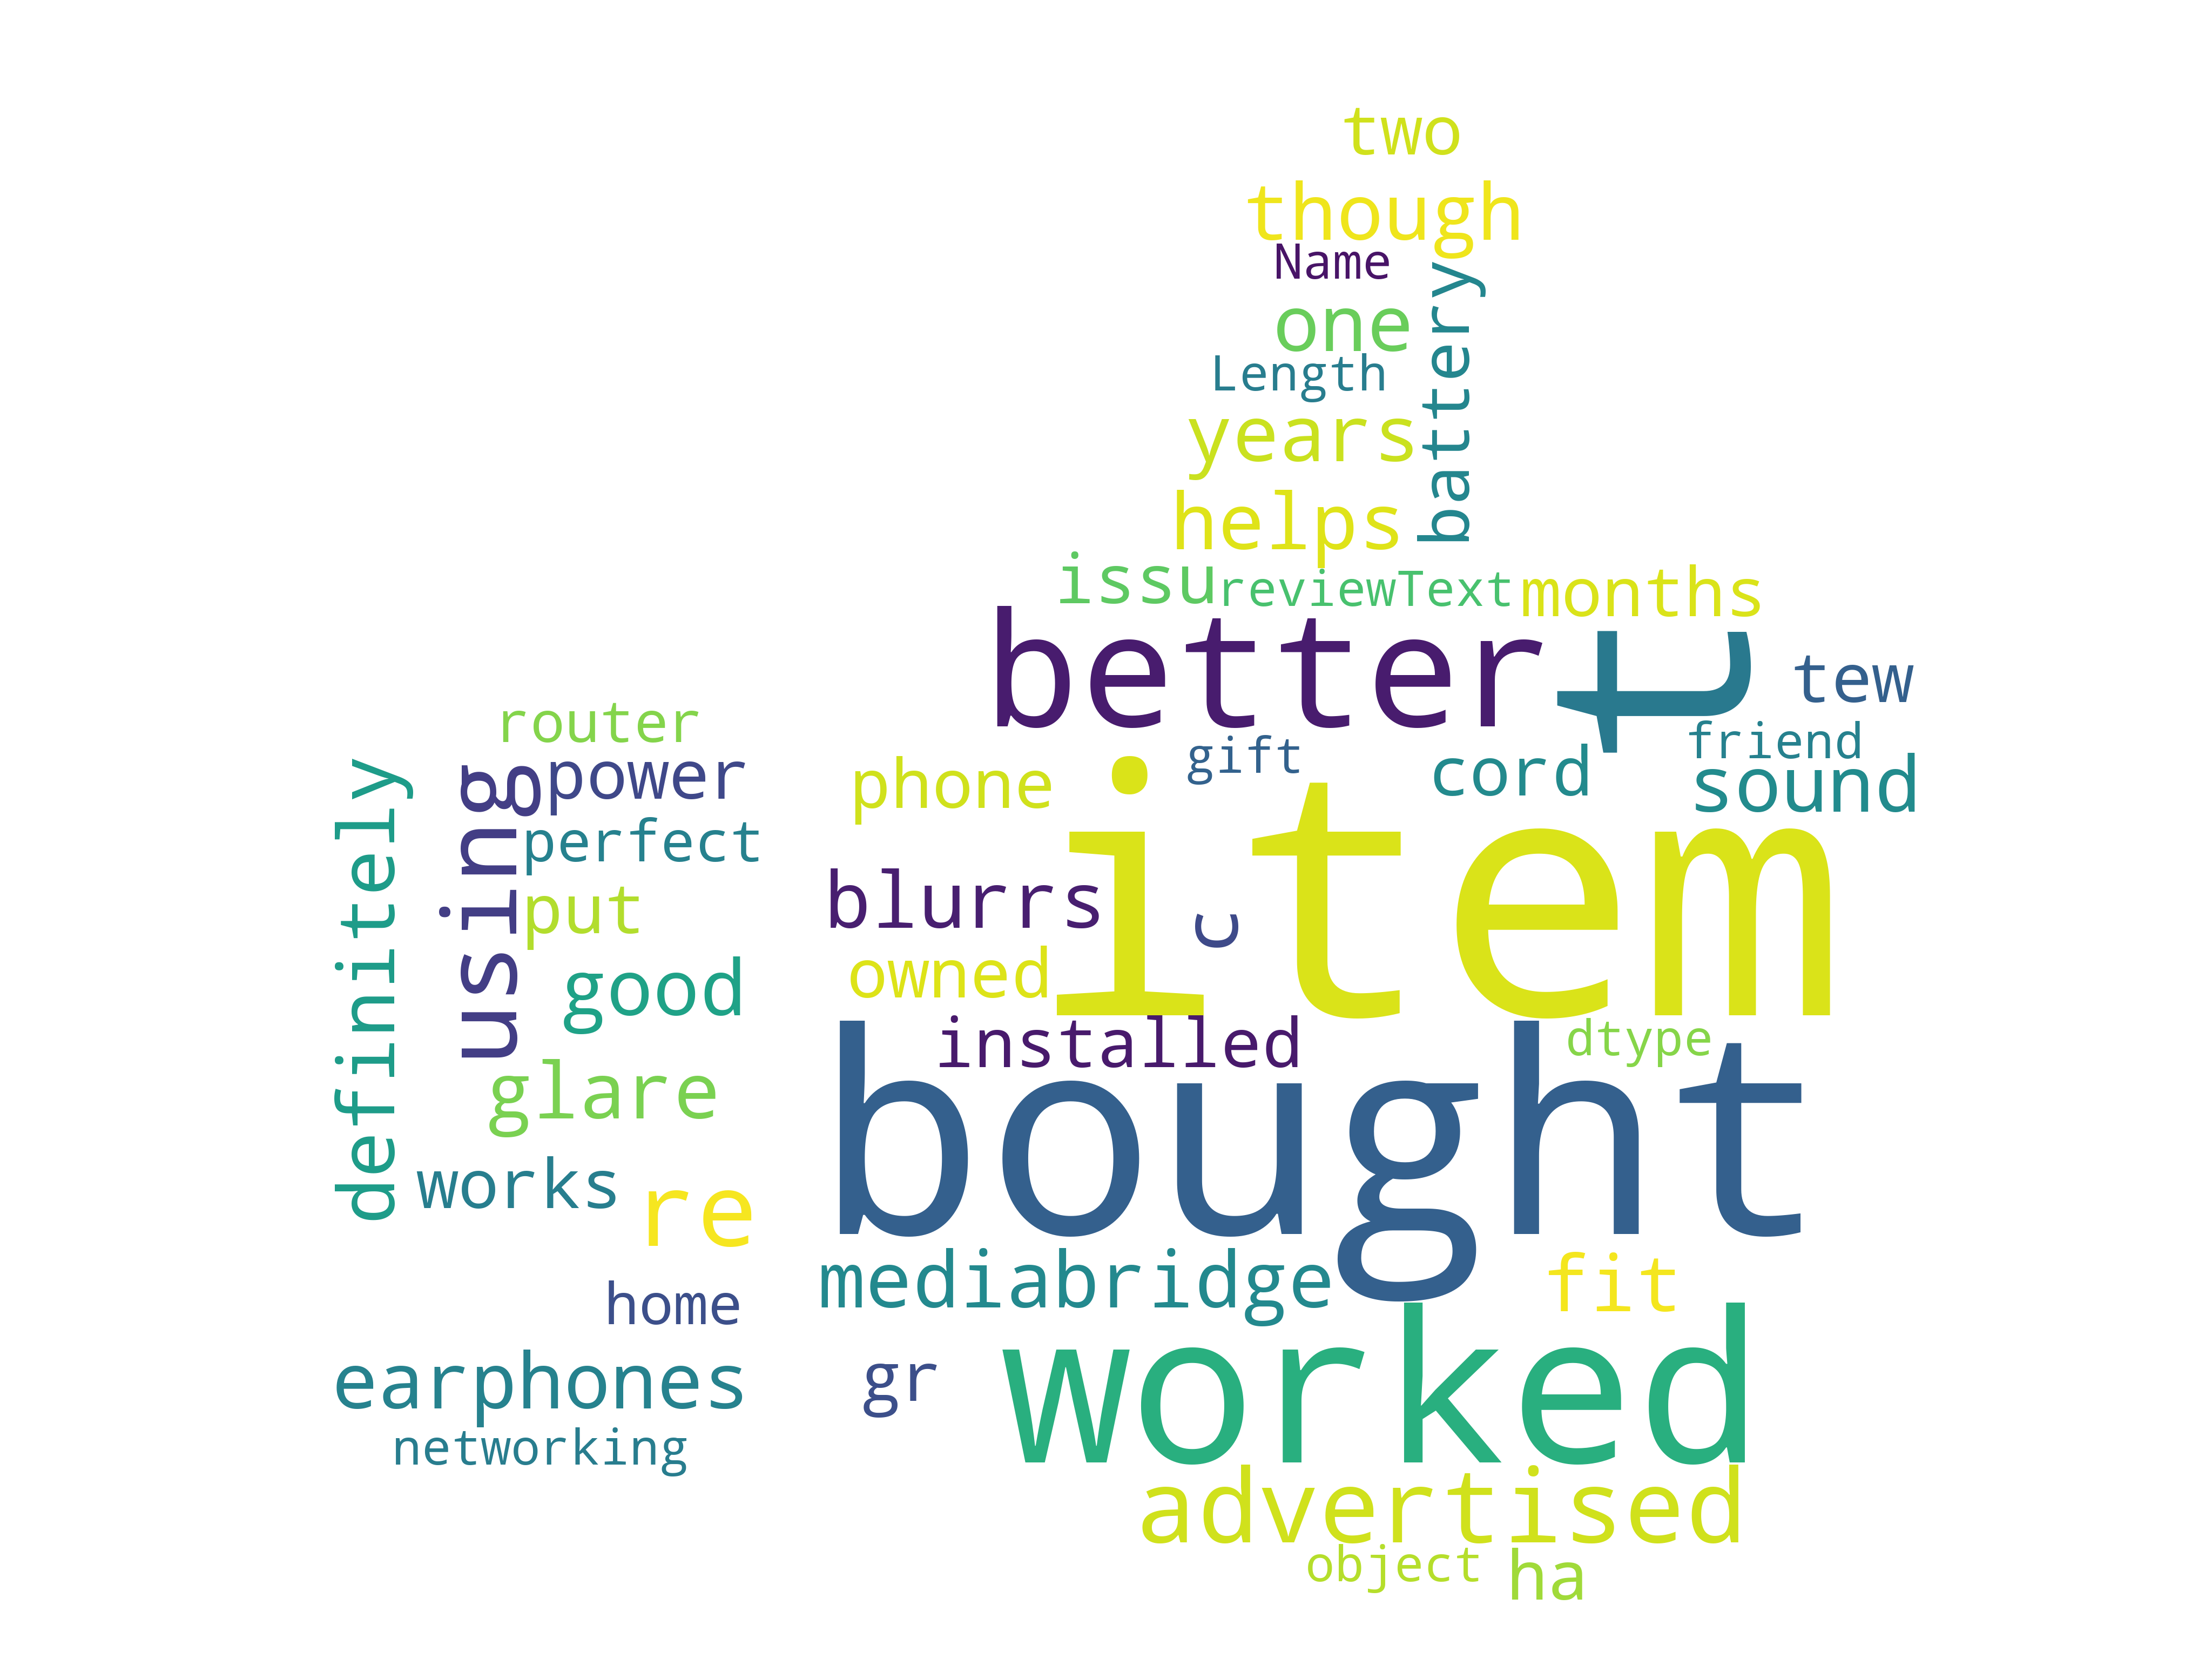

In [49]:
create_wordcloud(positive, 'upvote.png')

##Modelling

In [50]:
import pandas as pd

In [51]:
df = pd.read_csv('pause4.csv').drop('Unnamed: 0', axis=1)

In [52]:
df[df['sentimentOverall']=='negative']

,reviewText,overall,preprocessed,sentimentOverall,tokenized,polarity,subjectivity
8,i usually trust everything being sold at amazo...,2,I usually trust everything being sold at Amazo...,negative,"['i', 'usually', 'trust', 'everything', 'being...",-0.103571,0.492857
11,the usb port for this thing actually overheate...,1,the usb port for this thing actually overheate...,negative,"['the', 'usb', 'port', 'for', 'this', 'thing',...",0.000000,0.208333
16,"too small by about ""look elsewhere. product is...",2,"Too small by about 1""look elsewhere. product i...",negative,"['too', 'small', 'by', 'about', '``', 'look', ...",0.000000,0.600000
30,did not realize that it had to be removed to b...,2,Did not realize that it had to be removed to b...,negative,"['did', 'not', 'realize', 'that', 'it', 'had',...",0.500000,0.625000
39,"i've had this tablet for months and all good,...",1,I've had this tablet for 4 months and all good...,negative,"['i', ""'ve"", 'had', 'this', 'tablet', 'for', '...",-0.093000,0.439000
...,...,...,...,...,...,...,...
99871,it works better if it is unpluged..i got a set...,2,it works better if it is unpluged..i got a set...,negative,"['it', 'works', 'better', 'if', 'it', 'is', 'u...",0.500000,0.500000
99888,"when i got the headphones they looked great, i...",1,"when I got the headphones they looked great, I...",negative,"['when', 'i', 'got', 'the', 'headphones', 'the...",0.083965,0.660000
99905,i bought transcend gb class sdhc cards alon...,1,I bought 3 Transcend 16 GB Class 6 SDHC cards ...,negative,"['i', 'bought', 'transcend', 'gb', 'class', 's...",-0.009722,0.522222
99917,"unit will not stay correctly on your camera, ...",2,"Unit will not stay correctly on your camera, ...",negative,"['unit', 'will', 'not', 'stay', 'correctly', '...",0.195238,0.482143


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english') 

def split_into_lemmas(text):
    
    text = str(text).lower() 
    
    words = TextBlob(text).words
    
    return [stemmer.stem(word) for word in words]

In [54]:
x,y=df['reviewText'],df['sentimentOverall']
df['reviewText']

0        this item worked better than advertised, it re...
1        i have been using mediabridge for about  years...
2        i bought this item because it was one of the c...
3        definitely helps with glare though it blurrs t...
4        these earphones sound very good.  and they fit...
                               ...                        
99928    works just like any power cord should, no issu...
99929    i've owned the tew-gr for two months and it ha...
99930    too small !! not even an inch left literally !...
99931    just the perfect router for home networking. i...
99932    i bought these as a gift for a friend and she ...
Name: reviewText, Length: 99933, dtype: object

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=80)

##Vectorizing

In [60]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [61]:
vect=CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2), analyzer=split_into_lemmas)
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [63]:
b=MultinomialNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

In [64]:
accuracy_score(y_test,b_predict)

0.8321325648414986

In [65]:
vocab= vect.vocabulary_

In [66]:
import pickle
pickle.dump(model, open('NLP.pkl', 'wb'))
pickle.dump(vocab, open('Vocab.pkl', 'wb'))

In [67]:
df['reviewText'][2],df['sentimentOverall'][2]

("i bought this item because it was one of the cheapest adapters that had a few inches of wire. there have been no issues with sound signal degradation or loss -- the connections have always worked. i've had it plugged into my sennheisers for half a year now with no issues.",
 'positive')

In [68]:
df['reviewText'][17],df['sentimentOverall'][17]

("i previously purchased a wooden case from china for about $, but had some qualms with it, and then i stumbled on this...and it's definitely much better. i've only used it for a few minutes but i can tell it's going to be my primary case.the wood is very nice, and has a smooth, non-glossy coating; i wish it didn't have the boxwave logo carved into it, as it'd look much better, but i can't really complain (it's not that big anyway).the sides of the case are a matte plastic which offer very good grip, but as a caveat any grease on your fingers will give it a slight gray shimmer as it stays on the plastic.my headphones fit in the port, although headphones with thick jacks just may interfere with the case. charger fits without a problem - completely unobtrusive. s-pen glides in and out without a problem too. volume and power buttons are still easily accessible. the case doesn't interfere with pictures even though it hugs the module tightly.i can't attest to the actual level of protection,